# ORIE 4580/5580 Assignment 6

#### Students: Danielle Xu (dzx4) and Vicki Yang (vzy3)

### Github link: [Github link](https://github.com/vzy3/ORIE-4580-HW6)


### Instructions


* Due Tuesday, November 14, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

[Mor Harchol-Balter's chapter](https://canvas.cornell.edu/courses/56826/files/9180297/download?download_frd=1) on the Poisson process (on Canvas)

In [68]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import random

___
___

# Question 1: Everyone goes to Gimme! (25 points)

The downtown Ithaca Gimme! store sees a Poisson arrival process with rate

$$ \lambda(t)=\frac{1}{56}\left(5t^3-90t^2+300t+1480\right) \quad \text{for } 0 \leq t \leq 12,$$

over the 12 hours on the weekdays it is open.


___

**(a)** Compute the exact probability that the coffee store will see more than 250 customers in one 12 hour day. Do not use simulation.
___


## Ans.

This is a nonstationary Poisson arrival problem as arrival rate λ(t) is not constant.

The number of arrivals between zero and twelve hours has Poisson distribution with parameter:


 $$ = \int_{0}^{12} \frac{1}{56}(5t^3-90t^2+300t+1480) \,dt $$

 $$ = \frac{1}{56} * \int_{0}^{12} (5t^3-90t^2+300t+1480) \,dt $$

 $$ = \frac{1}{56} * (\frac{5}{4}t^4-30t^3+150t^2+1480t) |_{0}^{12} \ $$

 $$ \mu = 240 $$

 We then use this parameter to calculate the probability.

 $$ \mathbb{P}(X > 250) = 1-\mathbb{P}(X\leq250) = 1-[\mathbb{P}(X=0) + \mathbb{P}(X=1) + ... + \mathbb{P}(X=250)] $$

 Using a calculator for the final equation, the exact probability that the coffee store will see more than 250 customers in one 12 hours day is

 $$ = 1 - 0.752 $$

 $$ = 0.248 $$

___

**(b)** Use thinning to simulate 500 replications of the Poisson arrival process. Based on these replications, estimate the probability in Part (a) and report a 95\% confidence interval.

___

## Ans.

Thinning definition: given $ N(t) $ ~ $ PP(λ_{1}) $, let $ N_{1}(t) $ be process generated by retaining each arrival of N(t) independent  with probability p, and let $ N_{2}(t) = N(t) - N_{1}(t) $ be the rejected points.

Then $ N_{1}(t) $ ~ $ PP(λp) $ and $ N_{2}(t) = PP(λ(1-p)) $


Plan (from recitation): use a larger rate $\lambda^*$ to generate times, and then determine if an event actually occurred using $\lambda(t) / \lambda^*$.

1.  Find $\lambda^* \geq \max_t \lambda(t)$.
2.  Start with $n=0$, $T = T_0 = 0$.
3.  Generate interarrival time $A \sim \exp(\lambda^*)$.  Set $T = T+A$.  
4.  Generate $U \sim Unif[0,1]$.  If $U \leq \lambda(T)/\lambda^*$, then the event has occurred, so set $n=n+1$, $T_{n+1} = T$.
5.  Repeat steps 3, 4 until we get to the end of our time interval.

Find λ* = $ max_{t}λ(t) $ = $ \frac{1}{56}(5(t^3) - 90(t^2) + 300(t) + 1480) $

 $ \frac{d}{dt} \frac{1}{56}(5(t^3) - 90(t^2) + 300(t) + 1480) $ = 0
  
 = $ \frac{1}{56}(15(t^2) - 180(t) + 300) $ = 0

 = $ 15t^2 -180t + 300 = 0 $

 = $ 15(t^2 - 12t + 20) = 0 $

 = $ (t-2)(t-10) = 0 $

 t=2 and t=10 are the critical points. To find the maximum, I plugged it back into the original equation:

 t=2: $ \frac{1}{56}(5(2^3) - 90(2^2) + 300(2) + 1480) \approx 31.429 $

 t=10: $ \frac{1}{56}(5(10^3) - 90(10^2) + 300(10) + 1480) \approx 8.571 $

 Thus, λ* $ \approx 31.429 $ and occurs when t=2.

In [57]:
# Using sample code from recitation:

lambda_star = 31.429

reps = 500
probs = []

def function(t):
    return 1/56 * (5*(t**3) - 90*(t**2) + 300*(t) + 1480)

for i in range(reps):
    t = 0
    X = 0 # X = arrivals

    while t < 12:
        t = t + np.random.exponential(1/lambda_star) # scale=1/lambda
        U = np.random.rand()

        if U <= function(t) / lambda_star:
            X += 1

    probs.append(X > 250)
    # print(probs)

prob = sum(probs) / reps
print(f"Probability: {prob}")

# CI, also used sample code from the recitation
mean = np.mean(probs)
err = 1.96 * np.std(probs) / np.sqrt(reps)

print("mean: ", mean)
print("95% CI: ",(mean-err,mean+err))

Probability: 0.248
mean:  0.248
95% CI:  (0.21014651842696633, 0.2858534815730337)


___
**(c)** Based on your 500 replications, make a bar plot showing the average number of customers who arrive during each of the twelve hours of operation. Plot the rate function $\lambda(t)$ and compare.
___

## Ans.

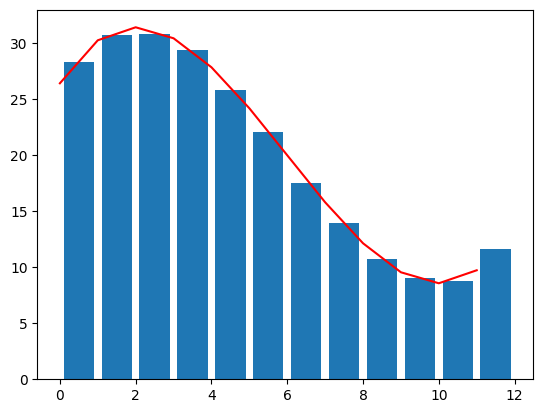

In [58]:
# Using sample code from recitation:
# I couldn't figure out how to continue off of (b) so I just copy pasted my code loop from earlier in order to plot.
reps = 500
total_number_in_each_hour = np.zeros(12)

for j in range(reps):
    # First generate the PP of the j-th replication
    X = [] # X = arrivals

    # Generate interarrival times at a rate lambda=16
    t = 0
    while t < 12:
        t = t + np.random.exponential(1/lambda_star) # scale=1/lambda
        U = np.random.rand()

        if U <= function(t) / lambda_star:
            X.append(t)

    # Now count the number of arrivals in each hour, for the j-th replication, and add it to the previous replication.
    for k in range(12):
        total_number_in_each_hour[k] += np.sum(np.array(X) < (k + 1)) - np.sum(np.array(X) < k)

avg_number_in_each_hour = total_number_in_each_hour / reps

# I used ChatGPT to help me with plotting the red rate function.
plt.bar(np.array(range(12)) + 0.5, avg_number_in_each_hour) # code from recitation
plt.plot(np.arange(0, 12), [function(t) for t in np.arange(0, 12)], 'r') # code using chatGPT's help




---
---


# Question 2: Putting my son to bed (30 points)

Sid uses a Spotify playlist with $n$ soothing songs to put his son to sleep. He plays the playlist on shuffle, but is worried that some songs may not get played (he spent a long time curating the playlist!).

___
**(a)**
Suppose Spotify truly picks a random song each time -- Sid wants to know how many songs it takes on average to play **every song** on his playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note: Try and pick a large range of $n$ to get a sense of the function of number of songs needed to play all vs. $n$ -- if you are adventurous, try to fit the function. Make sure you always show your CIs!*
___

## Ans.


In [13]:
def spotify_shuffle(num_songs, num_sims):
  num_plays = []
  for i in range(num_sims):
    songs = []
    plays = 0
    while len(songs) < num_songs:
      s = np.random.randint(0, num_songs)
      if s not in songs:
        songs.append(s)
      plays += 1
    num_plays.append(plays)
  avg_plays = np.mean(num_plays)
  ci = (avg_plays - 1.96*stats.sem(num_plays), avg_plays + 1.96*stats.sem(num_plays))
  return avg_plays, ci

#print(spotify_shuffle(20, 10000))

In [11]:
#testing on a range of n and with 95% confidence intervals
N = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300, 350]
for n in N:
  p, ci = spotify_shuffle(n, 10000)
  print("n: " + str(n) + ", num plays needed: " + str(p) + ", ci: " + str(ci))

n: 5, num plays needed: 11.3897, ci: (11.292025671180618, 11.487374328819381)
n: 10, num plays needed: 29.3309, ci: (29.108206119198922, 29.553593880801078)
n: 25, num plays needed: 95.1244, ci: (94.54136888078052, 95.70743111921946)
n: 50, num plays needed: 225.0162, ci: (223.8016533101526, 226.2307466898474)
n: 75, num plays needed: 367.6282, ci: (365.81038613220716, 369.44601386779283)
n: 100, num plays needed: 519.4863, ci: (517.0238694149236, 521.9487305850764)
n: 150, num plays needed: 841.2694, ci: (837.5336542304929, 845.0051457695072)
n: 200, num plays needed: 1171.0153, ci: (1166.0633844174317, 1175.9672155825683)
n: 250, num plays needed: 1525.4456, ci: (1519.1488727709502, 1531.7423272290498)
n: 300, num plays needed: 1881.5448, ci: (1874.0549341566218, 1889.034665843378)
n: 350, num plays needed: 2258.6454, ci: (2249.8664989864337, 2267.424301013566)


___

**(b)** On the other hand, Sid has realized that his son wakes up whenever he hears a song that has been played before (clever, isn't he!). Use your previous simulator to figure out how many songs Sid's son hears before he wakes up.

___

## Ans.



In [17]:
#making a slight change to the previous simulator
def spotify_shuffle(num_songs, num_sims):
  num_plays = []
  for i in range(num_sims):
    songs = []
    plays = 0
    while True:
      s = np.random.randint(0, num_songs)
      if s in songs:
        break
      plays += 1
      songs.append(s)
    num_plays.append(plays)
  avg_plays = np.mean(num_plays)
  ci = (avg_plays - 1.96*stats.sem(num_plays), avg_plays + 1.96*stats.sem(num_plays))
  return avg_plays, ci

#print(spotify_shuffle(20, 10000))

In [18]:
#testing on a range of n and with 95% confidence intervals
N = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300, 350]
for n in N:
  p, ci = spotify_shuffle(n, 10000)
  print("n: " + str(n) + ", num plays before waking up: " + str(p) + ", ci: " + str(ci))

n: 5, num plays before waking up: 2.503, ci: (2.4815623067465458, 2.5244376932534545)
n: 10, num plays before waking up: 3.6527, ci: (3.619140038364502, 3.6862599616354976)
n: 25, num plays before waking up: 5.9235, ci: (5.865758401192353, 5.981241598807647)
n: 50, num plays before waking up: 8.4648, ci: (8.381127548581949, 8.548472451418052)
n: 75, num plays before waking up: 10.6203, ci: (10.515029911536761, 10.72557008846324)
n: 100, num plays before waking up: 12.2037, ci: (12.08116642634887, 12.326233573651129)
n: 150, num plays before waking up: 15.1678, ci: (15.014703115962682, 15.320896884037317)
n: 200, num plays before waking up: 17.4384, ci: (17.265904687272027, 17.610895312727976)
n: 250, num plays before waking up: 19.5626, ci: (19.36465234162359, 19.76054765837641)
n: 300, num plays before waking up: 21.4506, ci: (21.234882901498374, 21.66631709850163)
n: 350, num plays before waking up: 23.2219, ci: (22.987984281759978, 23.455815718240025)


___

**(c)** Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the **last song to be played** for the first time using this shuffler.   

___

## Ans.

In [37]:
def spotify_randomizer(n, num_sims=10000):
  last_songs = []
  for i in range(num_sims):
    playlist = [0]
    s = 0
    while len(playlist) < n:
      if np.random.rand() < 0.5:
        s = (s+1) % n
      else:
        s = (s-1) % n
      if s not in playlist:
        playlist.append(s)
        if len(playlist) == n:
          last_songs.append(s)
  return last_songs

#print(spotify_randomizer(20))

Text(0.5, 1.0, 'Histogram of last song to be played for the first time')

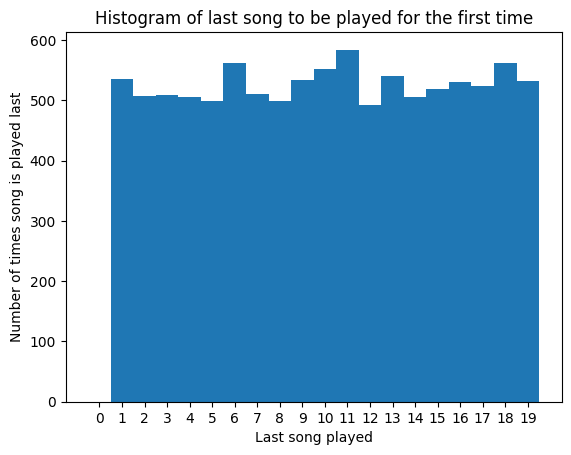

In [46]:
n = 20
last_songs = spotify_randomizer(n)
plt.hist(last_songs, bins=np.arange(21)-0.5)
plt.xticks(np.arange(n))
plt.xlabel("Last song played")
plt.ylabel("Number of times song is played last")
plt.title("Histogram of last song to be played for the first time")

___

**(d) (OPTIONAL)** For the above three questions, try and analytically derive the functions that you should get (and compare)

___
___

# Question 3: The gambler's ruin (20 points)

The gambler's ruin is one of the most famous and widely studied models in stochastic processes. Imagine two gamblers $A$ and $B$ are playing a tournament, where they each start with \$$a$ and \$$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving \$$1$ to the loser. Play goes on till one player runs out of money.

___

**(a)** Simulate this model to find the probability that player $A$ wins the overall tournament. Also, try and derive this analytically, and see how well the two match up.

___

## Ans.

Analytical answer: Using help from office hours

Starting at zero, we are trying to find the probability of getting to a or -b first.
Let recurrence relation f(i) = probability getting to a before -b, starting at i.

- f(a) = 1 (get to a = finish game, and b wins (a runs out))
- f(-b) = 0 (equal to zero because at once we're at b, we can't get to a before -b)


$f(i) = \frac{1}{2} f(i+1) + \frac{1}{2} f(i-1) $ for all i (for an unbiased coin)

There is an equal chance (1/2) of either going to i+1 or i-1 (The TA called this first step analysis/recurrence relation).


Let's try to prove that f is linear. We can claim that f is linear if we take the average of f(i+1) and f(i-1):

$$ \frac {f(i+1)+f(i-1)}{2} $$


Each step involves adding a fraction of f(i+1) and a fraction of f(i-1). The increments are constant, regardless of the value of i. f is increasing linearly from -b (f=0) to a (f=1).

Thus we can increase the function linearly. The total probability can be divided equally over the range of -b and a: For example, let's take -b=-3 and a=2. Then we can assign probabilities to each starting location:
- The probability of reaching a (a=2) starting at -b (-b=-3) = 0.
- The probability of reaching a (a=2) starting at -2 = 1/5.
- The probability of reaching a (a=2) starting at -1 = 2/5.

(The probability of reaching a is higher since now we are starting closer to a. THe probability increments by 1/5 every time because there are 5=(a+b) equal intervals between a and b).

- The probability of reaching a (a=2) starting at 0 = 3/5.
- The probability of reaching a (a=2) starting at 1 = 4/5 (Just need one jump to get to a).
- The probability of reaching a (a=2) starting at 5 = 5/5 (We are already at a).  

Generalized, the probability stating at zero and getting to a before b is a/a+b. This is the same as saying the probability of b winning is equal to 3/5 given starting amounts a=2 and b=3.
This example is proven in the simulation below.

If a and b start with the same amount, then the probability of either winning is roughly equal to 0.5.

In [61]:
# Went to office hours for help checking this code.
# Recommended: start initially A_amt = B_amt then change to more trivials #'s (5, 10, 20, etc)
# Process stops when one runs out of money
# Use random #'s for A & B

# I will be assuming that there is a typo in the question and that the winner actually recieves money from the loser.

start_A = 2
start_B = 3
A_wins = 0
B_wins = 0
reps = 10000

for i in range(reps):
    A_amt = start_A
    B_amt = start_B

    while A_amt > 0 and B_amt > 0:
        if random.uniform(0, 1) < 0.5: # If  U < 0.5, increment A (A wins). Decrement b. Else other scenario
            A_amt += 1
            B_amt -= 1
        else:
            A_amt -= 1
            B_amt += 1

    if A_amt > 0:
        A_wins += 1

prob_A_wins = A_wins / reps

print(prob_A_wins) # = 2/5, which is consistent with my work above.

0.4043


___
**(b)** Another question we can ask is how long it takes for the tournament to end. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

*Hint: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.*

___

## Ans.

ChatGPT was used in order to help make the different a value lines different colors in the final plot. Otherwise, other available help was from office hours (Wednesday 11/8 and Monday 11/13), which consisted of clarifying the problem and checking over my code. ChatGPT code is clearly labeled in my code below.

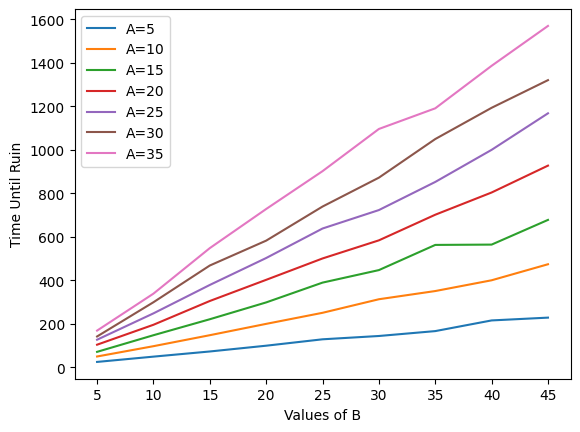

In [62]:
# My code

reps = 1000
A_val = range(5, 40, 5)
B_range = range(5, 50, 5)

def tournament(start_A, start_B):
    time_to_ruin = 0

    for i in range(reps):
        A_amt = start_A
        B_amt = start_B

        while A_amt > 0 and B_amt > 0:
            if random.uniform(0, 1) < 0.5:
                A_amt += 1
                B_amt -= 1
                time_to_ruin += 1
            else:
                A_amt -= 1
                B_amt += 1
                time_to_ruin += 1

    return time_to_ruin/reps


plt.figure()

B_val = np.array([])
num_flips = np.array([])

for A in A_val:
    for B in B_range:
        B_val = np.append(B_val, B)
        num_flips = np.append(num_flips, tournament(A, B))
# print(num_flips)

# ChatGPT code: Reshape B_val and num_flips to match the structure of A_val
num_points = len(A_val)
B_val = B_val.reshape((num_points, -1))
num_flips = num_flips.reshape((num_points, -1))
# print(num_flips)

for i in range(num_points):
    plt.plot(B_val[i], num_flips[i], label=f'A={A_val[i]}')

# My code
plt.xlabel("Values of B")
plt.ylabel("Time Until Ruin")
plt.legend()
plt.show()

___
___

# Question 4: Simulation assigments take forever (25 points)

You are convinced that Simulation homeworks take the longest time compared to all other assignments, while Sid maintains that all assignment times are identically distributed. To decide this debate once and for all, you decide to record how long it takes you to do your assignment, and then survey your friends on how long it took them to do their last assignment until you find someone who took longer$\ldots$

___

**(a)**
Suppose Sid is right (!) and all assignment completion times are truly identically distributed. Formally suppose your own assignment takes time (in hours) distributed as $T_0\sim Exp(0.5)$, and similarly the $i^{th}$ friend you survey also takes time $T_i\sim Exp(0.5)$, independent of all other friends. Run 100 simulations and report a $95\%$ CI for the expected number of friends you need to survey to find someone who takes longer.
___


## Ans.


In [63]:
num_sims = 100
friends_count = []
for i in range(num_sims):
  t0 = stats.expon(2).rvs()
  friends_needed =0
  while True:
    ti = stats.expon(2).rvs()
    friends_needed += 1
    if t0 < ti:
      break
  friends_count.append(friends_needed)

mean_friends = np.mean(friends_count)
ci = (mean_friends - 1.96*stats.sem(friends_count), mean_friends + 1.96*stats.sem(friends_count))

print("expected number of friends needed: " + str(mean_friends))
print("95% ci: " + str(ci))

expected number of friends needed: 4.51
95% ci: (2.904463166527668, 6.115536833472332)


___

**(b)** You are concerned that the CI looks a little wide, so decide to do more replications to fix the problem. Repeat the above simulation with number of replications $n\in\{100,500,1000,1500,2000,2500,\ldots,9500,10000\}$, and plot the estimates and $95\%$ CIs.
___

## Ans.


[5.6, 9.13, 9.068, 10.414, 28.4575, 6.3532, 8.049666666666667, 9.695714285714285, 8.20325, 7.456666666666667, 7.6662, 6.991454545454546, 8.898166666666667, 15.693076923076923, 10.071, 7.517333333333333, 11.907125, 10.371294117647059, 9.596444444444444, 9.197894736842105, 14.8767]
[2.5288910698892395, 4.4509251891328585, 5.863409839224345, 5.326881246551043, -13.724457483861993, 4.911354720021679, 5.381096713692244, 6.967245927834986, 5.322993917320679, 5.936825880272332, 5.613038544020523, 5.893994730401156, 6.75230174533689, 0.9210945910728938, 6.167126051436659, 6.097934489224496, 5.996773044332526, 7.332477818760429, 5.86828638955783, 7.038034991271524, 3.4025850566186513]
[8.67110893011076, 13.809074810867143, 12.272590160775653, 15.501118753448957, 70.63945748386199, 7.795045279978321, 10.71823661964109, 12.424182643593584, 11.083506082679321, 8.976507453061002, 9.719361455979477, 8.088914360507935, 11.044031587996443, 30.465059255080952, 13.97487394856334, 8.93673217744217, 17.81

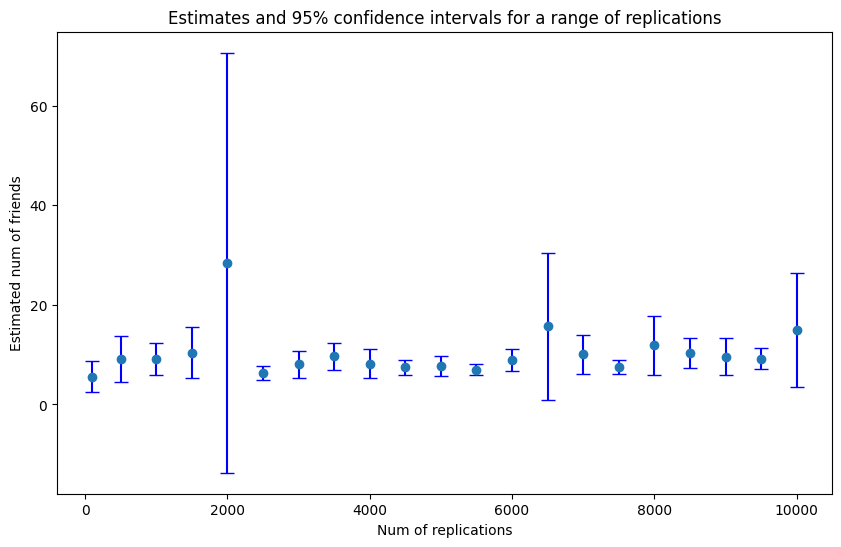

In [70]:
def friend_experiment(num_sims):
  friends_count = []
  for i in range(num_sims):
    t0 = stats.expon(2).rvs()
    friends_needed = 0
    while True:
      ti = stats.expon(2).rvs()
      friends_needed += 1
      if t0 < ti:
        break
    friends_count.append(friends_needed)

  mean_friends = np.mean(friends_count)
  ci = (mean_friends - 1.96*stats.sem(friends_count), mean_friends + 1.96*stats.sem(friends_count))
  return mean_friends, ci

N = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]

estimates = []
ci_lower = []
ci_upper = []

for n in N:
  mean, ci = friend_experiment(n)
  estimates.append(mean)
  ci_lower.append(ci[0])
  ci_upper.append(ci[1])

print(estimates)
print(ci_lower)
print(ci_upper)

plt.figure(figsize=(10, 6))
plt.errorbar(N, estimates, yerr=[np.array(estimates) - np.array(ci_lower),np.array(ci_upper) - np.array(estimates)], fmt='o', ecolor='blue', capsize=5)
plt.xlabel('Num of replications')
plt.ylabel('Estimated num of friends')
plt.title('Estimates and 95% confidence intervals for a range of replications')

___
**(c)** Hopefully you found the previous part a little surprising(?) Why is that the case? Well, this question highlights an important aspect of simulation that we have taken for granted in past problems -- in order to get an estimator for an unknown quantity, we *need that quantity to be finite*! Find an expression for computing the expected number of queries till we get one which is larger in the above setting, and argue that it is infinite.

*Hint: Remember how we used linearity of expectation and indicator random variables before? Try doing the same, with indicator variables for the $i^{th}$ person (for each $i\in\{1,2,\ldots\}$) being the first person surveyed who took longer than you).*
___


## Ans.

Let us use an indicator variable $X_i$ to represent whether a friend $i$ takes longer than you to complete an assignment. $X_i = 1$ if they take longer and $X_i = 0$ if you take longer. Since exponential variables are memoryless, the probability of the friend taking longer is 0.5 and the probability of you taking longer is 0.5. So for a friend to take longer than you (i.e. $X_i = 1$), then all friends before $i$ must take shorter so $X_i = 1$ has a probability of $(\frac{1}{2})^i$. We can then take the expected number of friends before finding one with a longer assignment time to be $= \sum_{i=1}^∞ i(\frac{1}{2})^i$, which results in an infinite sum, meaning that it is possible to need to ask an infinitely large number of friends before finding one with a longer assignment time than you - so this is not finite.